## rdkit to visualise molecules in DataFrame

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools

In [3]:
df = pd.read_csv("ecoli_mics.csv")
df.head()

,molecule_chembl_id,smiles,standard_type,standard_relation,standard_value,standard_units,assay_chembl_id
0,CHEMBL3621433,Cc1ccc(N(CC#N)Cc2ccc(F)cc2F)cc1,MIC,'=',128.00,ug.mL-1,CHEMBL3625335
1,CHEMBL4450418,N#C[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)(=O)[O-].[Na+],MIC,'<=',0.12,ug.mL-1,CHEMBL5247824
2,CHEMBL2236659,O=C(/C=C/c1c(Cl)cccc1Cl)c1ccc[nH]1,MIC,'=',15.60,ug.mL-1,CHEMBL3061488
3,CHEMBL4127175,OB(O)c1ccc(Cn2cc(-c3ccccn3)nn2)cc1,MIC,'<=',0.03,ug.mL-1,CHEMBL4123733
4,CHEMBL296800,COc1cc2oc(-c3ccccc3)cc(=O)c2c(O)c1O,MIC,'>',125.00,ug.mL-1,CHEMBL682907


In [4]:
df_select = df[["molecule_chembl_id", "smiles"]]
df_select

,molecule_chembl_id,smiles
0,CHEMBL3621433,Cc1ccc(N(CC#N)Cc2ccc(F)cc2F)cc1
1,CHEMBL4450418,N#C[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)(=O)[O-].[Na+]
2,CHEMBL2236659,O=C(/C=C/c1c(Cl)cccc1Cl)c1ccc[nH]1
3,CHEMBL4127175,OB(O)c1ccc(Cn2cc(-c3ccccn3)nn2)cc1
4,CHEMBL296800,COc1cc2oc(-c3ccccc3)cc(=O)c2c(O)c1O
...,...,...
295,CHEMBL5177243,CNC1=NC(=O)C(C(C)c2c[nH]c3c(F)cccc23)O1
296,CHEMBL3221106,C#CCOc1ccc(OCC=C)c(C(=O)NO)c1
297,CHEMBL22,COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC
298,CHEMBL1455814,COc1ccc2[nH]c(-c3ccccc3)nc2c1


In [5]:
df_select.isna().any()

molecule_chembl_id    False
smiles                 True
dtype: bool

In [6]:
df_clean = df_select.dropna()

In [7]:
PandasTools.AddMoleculeColumnToFrame(df_clean, smilesCol="smiles")

c:\Users\jschoer\Desktop\DSA103 Coding and Tests\DSA103\LifeScienceData\.venv\Lib\site-packages\rdkit\Chem\PandasTools.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,molecule_chembl_id,smiles,ROMol
0,CHEMBL3621433,Cc1ccc(N(CC#N)Cc2ccc(F)cc2F)cc1,
1,CHEMBL4450418,N#C[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)(=O)[O-].[Na+],
2,CHEMBL2236659,O=C(/C=C/c1c(Cl)cccc1Cl)c1ccc[nH]1,
3,CHEMBL4127175,OB(O)c1ccc(Cn2cc(-c3ccccn3)nn2)cc1,
4,CHEMBL296800,COc1cc2oc(-c3ccccc3)cc(=O)c2c(O)c1O,
...,...,...,...
295,CHEMBL5177243,CNC1=NC(=O)C(C(C)c2c[nH]c3c(F)cccc23)O1,
296,CHEMBL3221106,C#CCOc1ccc(OCC=C)c(C(=O)NO)c1,
297,CHEMBL22,COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC,
298,CHEMBL1455814,COc1ccc2[nH]c(-c3ccccc3)nc2c1,

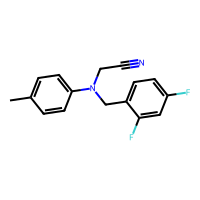
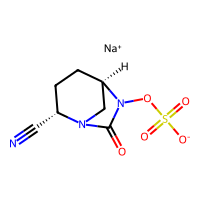
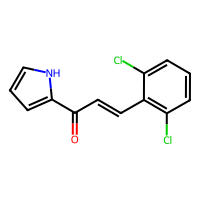
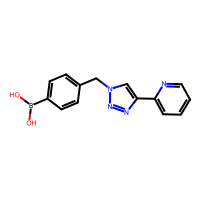
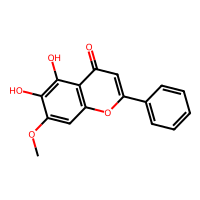
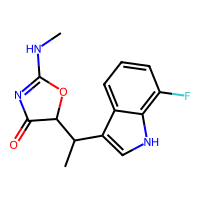
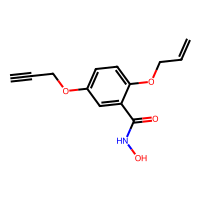
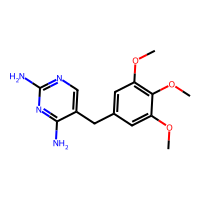
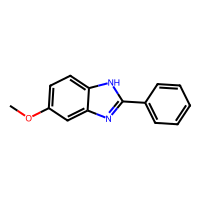
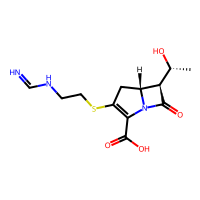

In [8]:
df_clean

## rdkit to convert smiles into canonical smiles

Process: 

1) create Mol object from smiles
2) generate smiles from Mol object

In [9]:
import pandas as pd
from rdkit import Chem

In [10]:
def canonicalise(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return ""
    else:
        return Chem.MolToSmiles(mol)

In [11]:
df = pd.read_csv("ecoli_mics.csv")
df = df[["molecule_chembl_id", "smiles"]]
df.dropna(inplace=True)
df

,molecule_chembl_id,smiles
0,CHEMBL3621433,Cc1ccc(N(CC#N)Cc2ccc(F)cc2F)cc1
1,CHEMBL4450418,N#C[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)(=O)[O-].[Na+]
2,CHEMBL2236659,O=C(/C=C/c1c(Cl)cccc1Cl)c1ccc[nH]1
3,CHEMBL4127175,OB(O)c1ccc(Cn2cc(-c3ccccn3)nn2)cc1
4,CHEMBL296800,COc1cc2oc(-c3ccccc3)cc(=O)c2c(O)c1O
...,...,...
295,CHEMBL5177243,CNC1=NC(=O)C(C(C)c2c[nH]c3c(F)cccc23)O1
296,CHEMBL3221106,C#CCOc1ccc(OCC=C)c(C(=O)NO)c1
297,CHEMBL22,COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC
298,CHEMBL1455814,COc1ccc2[nH]c(-c3ccccc3)nc2c1


In [12]:
df['new_smiles'] = df['smiles'].apply(canonicalise)
df.head(20)

,molecule_chembl_id,smiles,new_smiles
0,CHEMBL3621433,Cc1ccc(N(CC#N)Cc2ccc(F)cc2F)cc1,Cc1ccc(N(CC#N)Cc2ccc(F)cc2F)cc1
1,CHEMBL4450418,N#C[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)(=O)[O-].[Na+],N#C[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)(=O)[O-].[Na+]
2,CHEMBL2236659,O=C(/C=C/c1c(Cl)cccc1Cl)c1ccc[nH]1,O=C(/C=C/c1c(Cl)cccc1Cl)c1ccc[nH]1
3,CHEMBL4127175,OB(O)c1ccc(Cn2cc(-c3ccccn3)nn2)cc1,OB(O)c1ccc(Cn2cc(-c3ccccn3)nn2)cc1
4,CHEMBL296800,COc1cc2oc(-c3ccccc3)cc(=O)c2c(O)c1O,COc1cc2oc(-c3ccccc3)cc(=O)c2c(O)c1O
5,CHEMBL5414996,O=C(O)c1nccn1CCc1ccc([N+](=O)[O-])cc1,O=C(O)c1nccn1CCc1ccc([N+](=O)[O-])cc1
6,CHEMBL575061,O=c1ccsn1-c1ccc(Cl)cc1,O=c1ccsn1-c1ccc(Cl)cc1
7,CHEMBL5573576,O=C(Nc1ccccn1)c1ccc2c(c1)OCCCO2,O=C(Nc1ccccn1)c1ccc2c(c1)OCCCO2
8,CHEMBL5416386,[C-]#[N+]c1ccc(NC(=O)Cc2c[nH]c3ccccc23)cc1,[C-]#[N+]c1ccc(NC(=O)Cc2c[nH]c3ccccc23)cc1
9,CHEMBL3275000,C=C(C)c1cnc([N+](=O)[O-])n1C,C=C(C)c1cnc([N+](=O)[O-])n1C
